In [1]:
import scipy.io as sp
import pandas as pd
import utils as ut
import statistics as st

In [2]:
COORD_PRECISION = 8

In [3]:
yancoMatCols = ['stemp', 'TBh1', 'TBh2', 'TBh3', 'TBh4', 'TBv1', 'TBv2', 'TBv3', 'TBv4', 'latDeg', 'lngDeg']
yancoMat09 = pd.DataFrame(sp.loadmat('yanko-data/Yanco_Elbara_data/geodata_20150909.mat')['fdata'], columns=yancoMatCols)
yancoMat09['srcDate'] = '20150909'
yancoMat11 = pd.DataFrame(sp.loadmat('yanko-data/Yanco_Elbara_data/geodata_20150911.mat')['fdata'], columns=yancoMatCols)
yancoMat11['srcDate'] = '20150911'
yancoMat14 = pd.DataFrame(sp.loadmat('yanko-data/Yanco_Elbara_data/geodata_20150914.mat')['fdata'], columns=yancoMatCols)
yancoMat14['srcDate'] = '20150914'
yancoMat17 = pd.DataFrame(sp.loadmat('yanko-data/Yanco_Elbara_data/geodata_20150917.mat')['fdata'], columns=yancoMatCols)
yancoMat17['srcDate'] = '20150917'
yancoMat19 = pd.DataFrame(sp.loadmat('yanko-data/Yanco_Elbara_data/geodata_20150919.mat')['fdata'], columns=yancoMatCols)
yancoMat19['srcDate'] = '20150919'
yancoMat22 = pd.DataFrame(sp.loadmat('yanko-data/Yanco_Elbara_data/geodata_20150922.mat')['fdata'], columns=yancoMatCols)
yancoMat22['srcDate'] = '20150922'
yancoMat24 = pd.DataFrame(sp.loadmat('yanko-data/Yanco_Elbara_data/geodata_20150924.mat')['fdata'], columns=yancoMatCols)
yancoMat24['srcDate'] = '20150924'
yancoMat27 = pd.DataFrame(sp.loadmat('yanko-data/Yanco_Elbara_data/geodata_20150927.mat')['fdata'], columns=yancoMatCols)
yancoMat27['srcDate'] = '20150927'
yancoMatAll = pd.concat([yancoMat09, yancoMat11, yancoMat14, yancoMat17, yancoMat19, yancoMat22, yancoMat24, yancoMat27])

In [4]:
yancoCSV09 = pd.read_csv('yanko-data/Yanco_Elbara_data/0909.csv')
yancoCSV09['srcDate'] = '20150909'
yancoCSV11 = pd.read_csv('yanko-data/Yanco_Elbara_data/0911.csv')
yancoCSV11['srcDate'] = '20150911'
yancoCSV14 = pd.read_csv('yanko-data/Yanco_Elbara_data/0914.csv')
yancoCSV14['srcDate'] = '20150914'
yancoCSV17 = pd.read_csv('yanko-data/Yanco_Elbara_data/0917.csv')
yancoCSV17['srcDate'] = '20150917'
yancoCSV19 = pd.read_csv('yanko-data/Yanco_Elbara_data/0919.csv')
yancoCSV19['srcDate'] = '20150919'
yancoCSV22 = pd.read_csv('yanko-data/Yanco_Elbara_data/0922.csv')
yancoCSV22['srcDate'] = '20150922'
yancoCSV24 = pd.read_csv('yanko-data/Yanco_Elbara_data/0924.csv')
yancoCSV24['srcDate'] = '20150924'
yancoCSV27 = pd.read_csv('yanko-data/Yanco_Elbara_data/0927.csv')
yancoCSV27['srcDate'] = '20150927'
yancoCSVAll = pd.concat([yancoCSV09, yancoCSV11, yancoCSV14, yancoCSV17, yancoCSV19, yancoCSV22, yancoCSV24, yancoCSV27])

In [5]:
yancoCSVAll['latDeg'] = yancoCSVAll.apply(lambda row: ut.utmToLatLng(55, row['LONGITUDE'], row['LATITUDE'])[0], axis=1)
yancoCSVAll['lngDeg'] = yancoCSVAll.apply(lambda row: ut.utmToLatLng(55, row['LONGITUDE'], row['LATITUDE'])[1], axis=1)
yancoCSVAll['coord_id'] = yancoCSVAll.groupby([yancoCSVAll['latDeg'].round(COORD_PRECISION), yancoCSVAll['lngDeg'].round(COORD_PRECISION)]).ngroup()
yancoCSVAll

,FID_,POINT_ID,COMMENT,CAL_MOISTU,TEMP_C,REAL_DC,REAL_DC_TC,IMAG_DC,IMAG_DC_TC,SALINITY,...,ROCK_FRAC,IRRI_TYPE,DEW,LATITUDE,LONGITUDE,ALTITUDE,srcDate,latDeg,lngDeg,coord_id
0,NaN,1,,0.406669,11.7,28.303,28.444692,14.810,17.693,0.523,...,0,,,6.127888e+06,435262.280142,140.5,20150909,-34.989530,146.290655,522
1,NaN,2,,0.403992,12.4,28.945,28.185629,9.896,11.625,0.342,...,0,NaN,NaN,6.128376e+06,435401.362026,142.9,20150909,-34.985145,146.292217,714
2,NaN,3,,0.362300,11.5,24.662,24.304857,10.165,12.168,0.412,...,0,NaN,NaN,6.128376e+06,435346.743952,141.4,20150909,-34.985135,146.291618,724
3,NaN,4,,0.357052,11.3,24.196,23.836786,9.914,11.914,0.410,...,0,NaN,NaN,6.128377e+06,435283.451221,140.7,20150909,-34.985120,146.290925,739
4,NaN,5,,0.519548,11.6,38.773,40.443585,28.497,34.245,0.735,...,0,NaN,NaN,6.128375e+06,435209.691233,141.8,20150909,-34.985141,146.290117,716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,NaN,194,,0.070184,29.5,5.129,5.172895,2.328,2.144,0.454,...,0,,NaN,6.126888e+06,434508.118239,139.0,20150927,-34.998500,146.282313,88
194,NaN,195,,0.086762,29.5,5.851,5.881166,3.097,2.848,0.529,...,0,,NaN,6.126888e+06,434508.119567,139.0,20150927,-34.998501,146.282313,87
195,NaN,196,,0.123039,29.5,7.615,7.589496,5.453,5.015,0.716,...,0,,NaN,6.126879e+06,434579.063874,139.1,20150927,-34.998588,146.283090,69
196,NaN,197,,0.094918,29.5,6.229,6.246264,3.623,3.332,0.582,...,0,,NaN,6.126879e+06,434579.215966,139.1,20150927,-34.998588,146.283092,70


In [6]:
yancoMatAll['coord_id'] = yancoMatAll.groupby([yancoMatAll['latDeg'].round(COORD_PRECISION), yancoMatAll['lngDeg'].round(COORD_PRECISION)]).ngroup()
yancoMatAll

,stemp,TBh1,TBh2,TBh3,TBh4,TBv1,TBv2,TBv3,TBv4,latDeg,lngDeg,srcDate,coord_id
0,251.026001,159.473648,159.001146,160.404243,160.046466,181.548047,181.519552,183.860188,183.312459,-34.986576,146.292414,20150909,5966
1,251.026101,158.934831,158.863145,159.807478,160.051016,181.224948,181.032874,183.647902,183.578546,-34.986486,146.292408,20150909,5976
2,251.026200,158.769725,158.844588,159.824764,159.998732,181.197201,181.173789,183.573022,183.299313,-34.986406,146.292393,20150909,5986
3,251.026300,158.663277,158.596051,159.753829,159.817997,181.410876,158.074067,183.193683,159.396135,-34.986314,146.292381,20150909,6005
4,251.026399,159.095075,158.787682,160.197371,160.093616,181.304960,181.091428,183.435883,183.542279,-34.986193,146.292361,20150909,6023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,269.097656,244.866734,269.025497,245.144225,268.828243,266.878608,270.392545,267.557085,270.457762,-34.998468,146.283987,20150927,1646
1289,269.097755,254.739697,250.519522,254.881644,250.676279,266.818142,263.498755,267.503693,263.947515,-34.998514,146.284156,20150927,1638
1290,269.097854,249.981360,253.156354,250.707844,253.183350,267.766126,262.432360,267.796357,262.709848,-34.998558,146.284337,20150927,1612
1291,269.097954,254.457875,253.897206,255.025719,254.519935,268.409834,265.301469,268.556088,265.316500,-34.998584,146.284526,20150927,1365


In [7]:
yancoMatAll = yancoMatAll.sort_values(['coord_id'])
yancoCSVAll = yancoCSVAll.sort_values(['coord_id'])
yancoAll = pd.merge_asof(yancoMatAll, yancoCSVAll, on='coord_id', direction='nearest')
yancoAll.to_csv('combined_yanco.csv')

In [8]:
ovalMatAll = sp.loadmat('matlab_lmeb/geodata_rall_SM.mat')['RES']
ovalMatCols = ['col1', 'TBh1', 'TBh2', 'TBh3', 'TBh4', 'TBv1', 'TBv2', 'TBv3', 'TBv4', 'latDeg', 'lngDeg', 'lmebRet']
ovalMatAll = pd.DataFrame(ovalMatAll, columns=ovalMatCols)
ovalMatAll.to_csv('combined_oval.csv')

In [15]:
yancoMatDfs = [yancoMat09, yancoMat11, yancoMat14, yancoMat17, yancoMat19, yancoMat22, yancoMat24, yancoMat27]
yancoCSVDfs = [yancoCSV09, yancoCSV11, yancoCSV14, yancoCSV17, yancoCSV19, yancoCSV22, yancoCSV24, yancoCSV27]

In [22]:
for df in yancoCSVDfs:
    df['latDeg'] = df.apply(lambda row: ut.utmToLatLng(55, row['LONGITUDE'], row['LATITUDE'])[0], axis=1)
    df['lngDeg'] = df.apply(lambda row: ut.utmToLatLng(55, row['LONGITUDE'], row['LATITUDE'])[1], axis=1)
    df['Soil Moisture'] = df['CAL_MOISTU']

for df in yancoMatDfs:
    df['TBhAve'] = df.apply(lambda row: st.mean([row['TBh1'], row['TBh2'], row['TBh3'], row['TBh4']]), axis=1)
    df['TBvAve'] = df.apply(lambda row: st.mean([row['TBv1'], row['TBv2'], row['TBv3'], row['TBv4']]), axis=1)

/Users/lintoncharles/Documents/University/FIT4701_2/code/Autonomous-Soil-Moisture-Mapping/utils.py:88: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


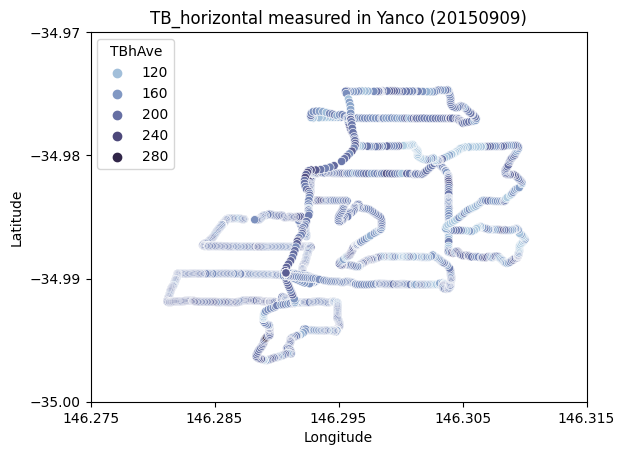

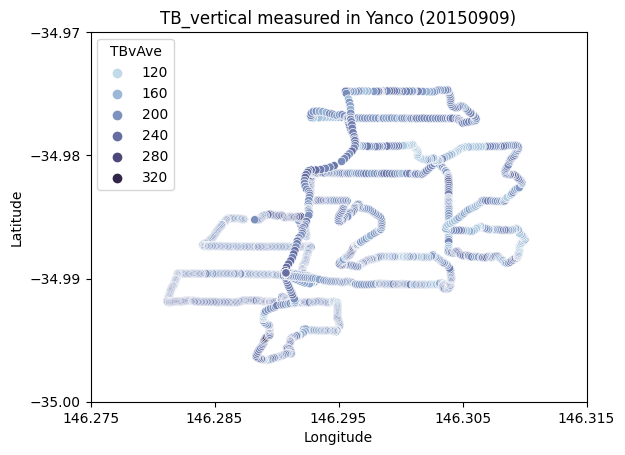

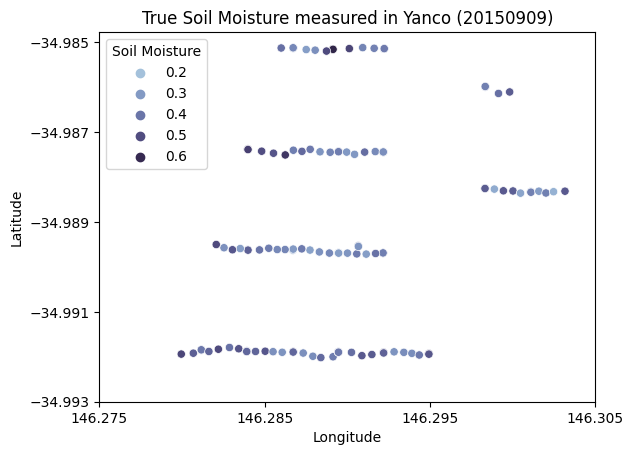

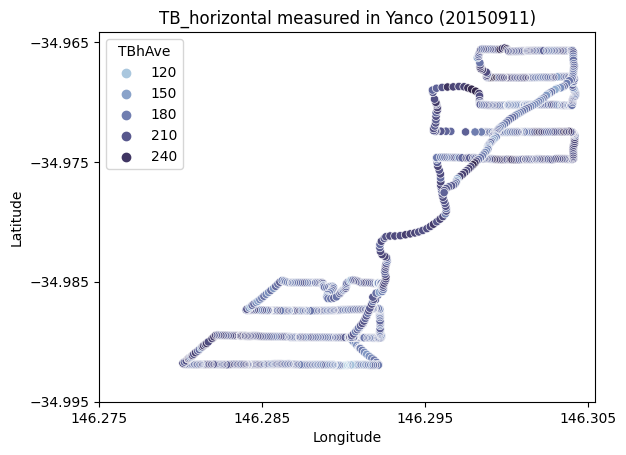

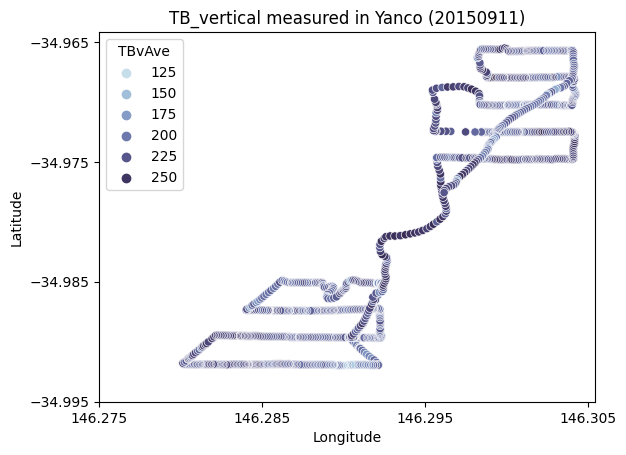

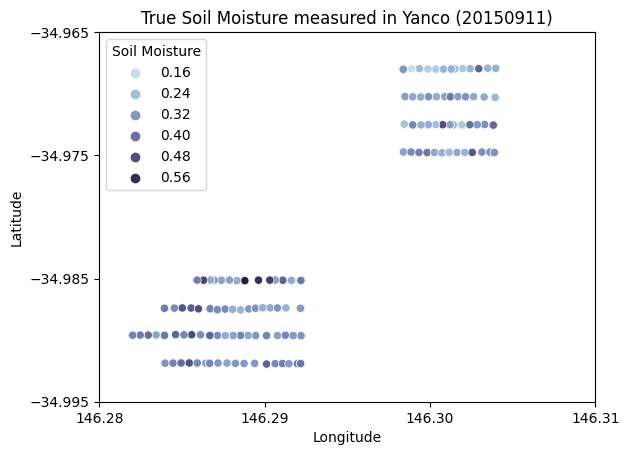

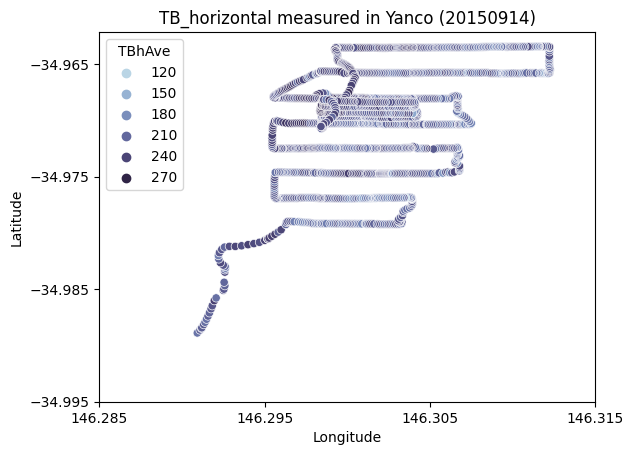

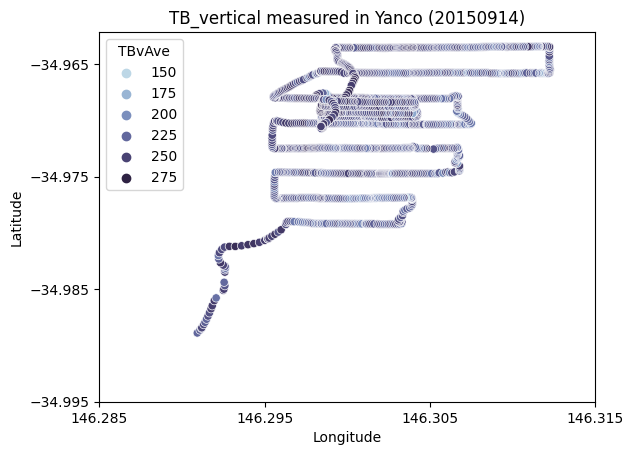

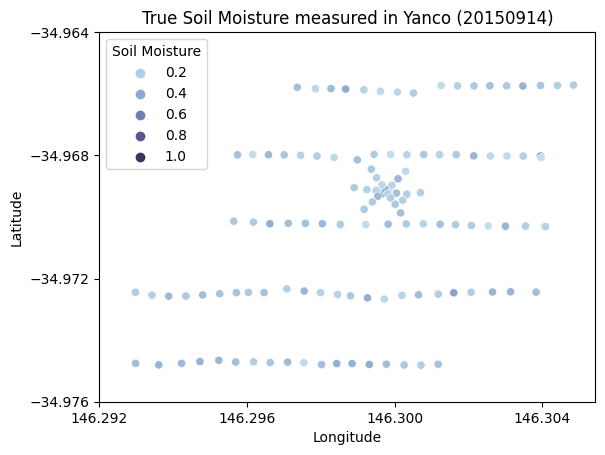

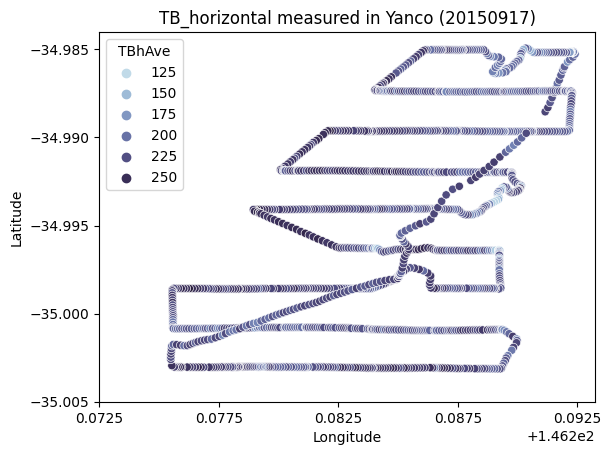

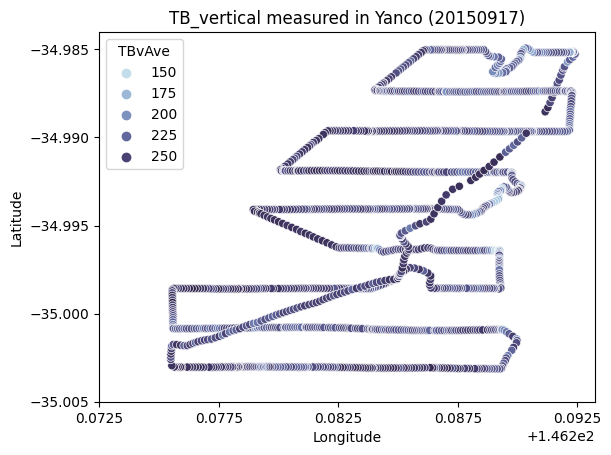

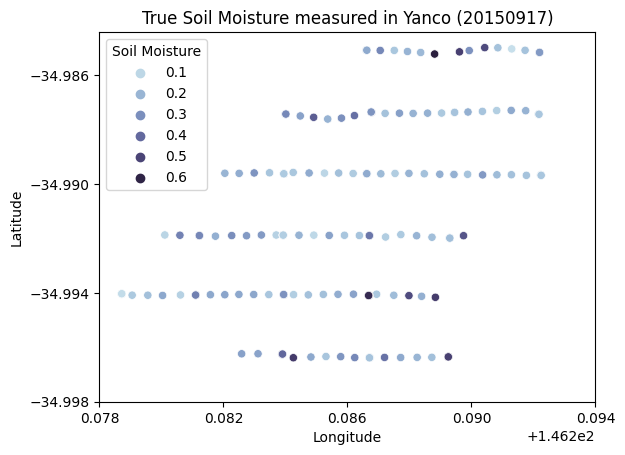

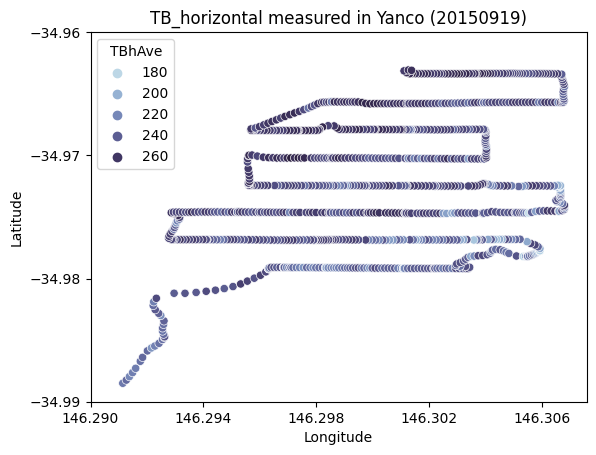

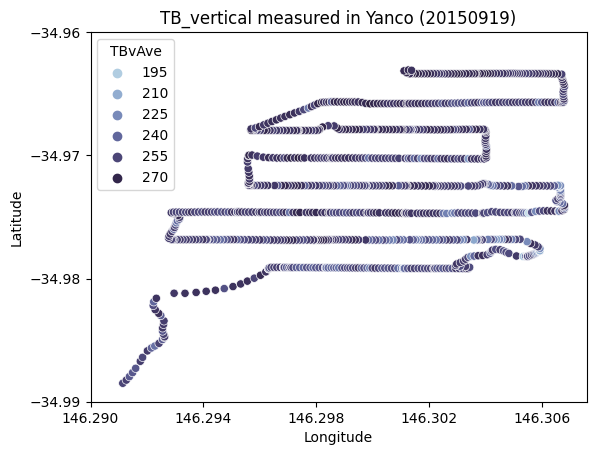

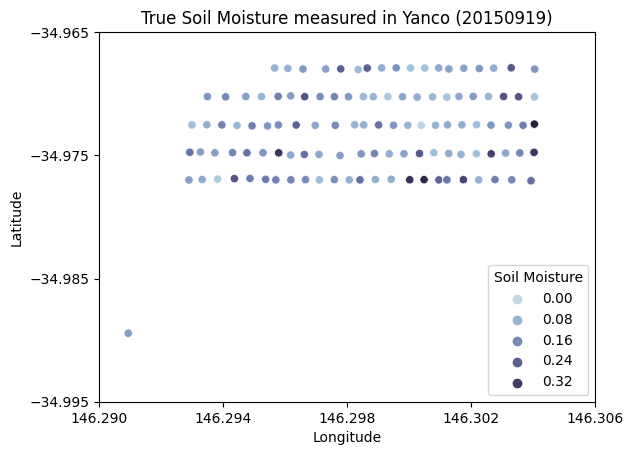

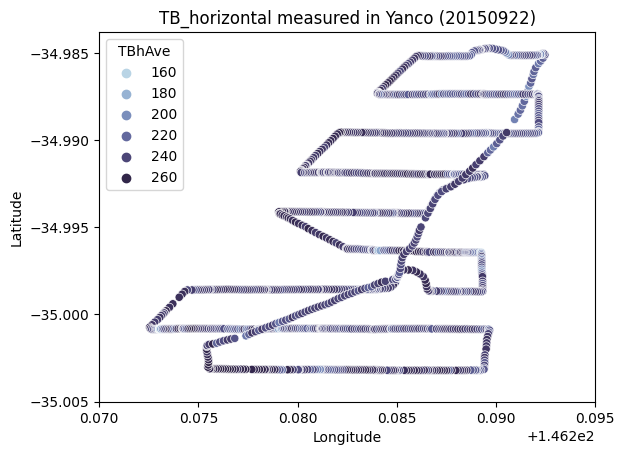

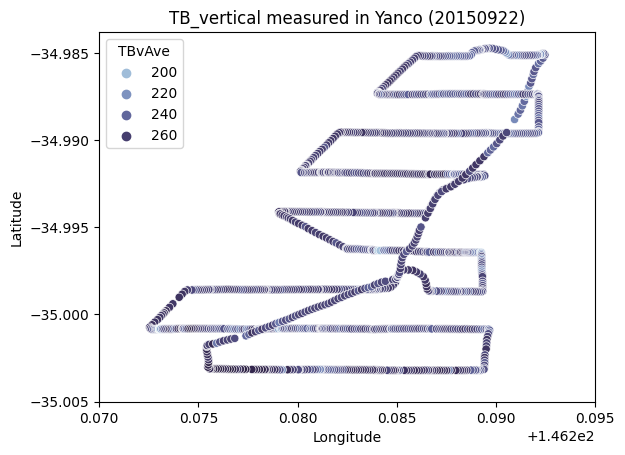

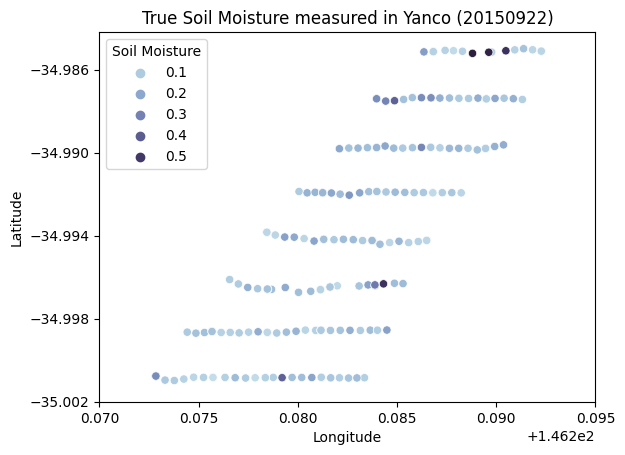

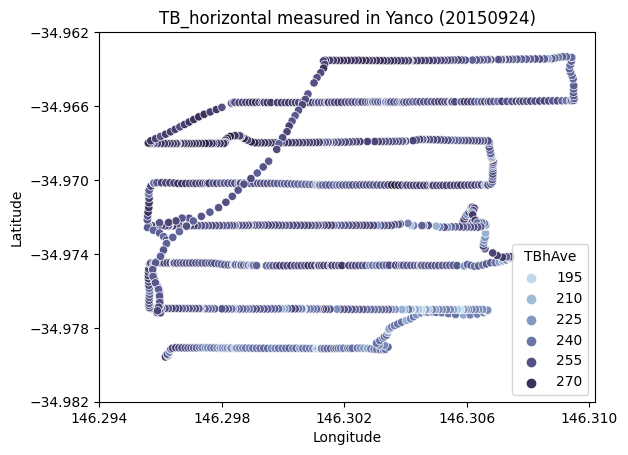

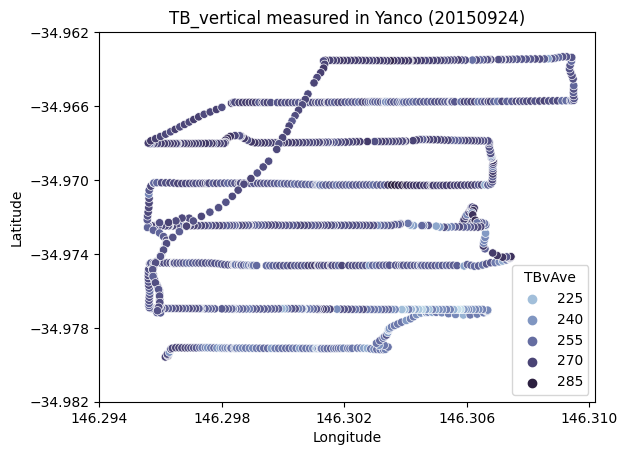

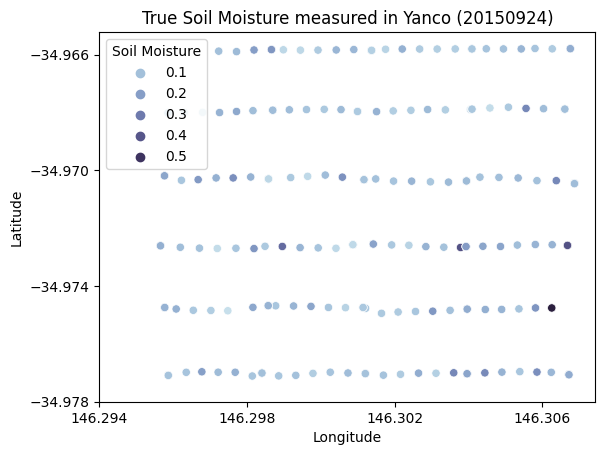

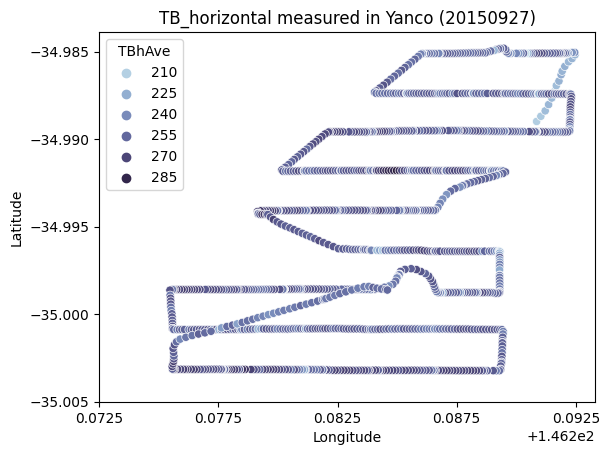

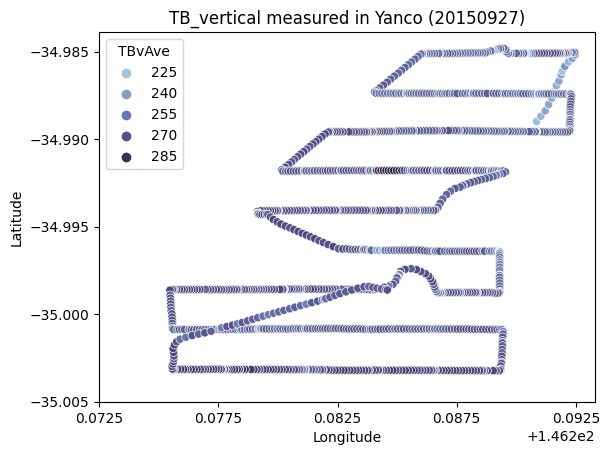

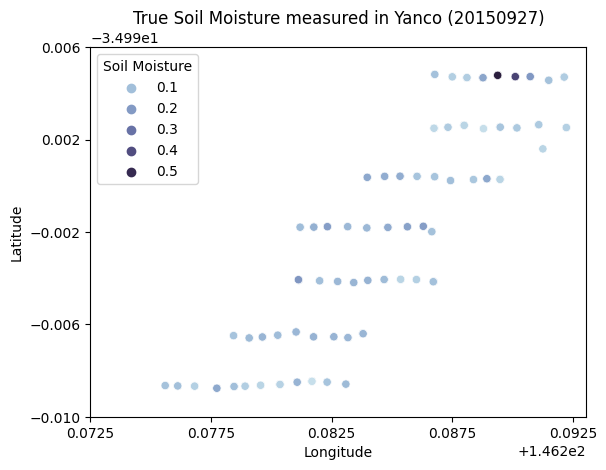

In [23]:
for i in range(len(yancoMatDfs)):
    df = yancoMatDfs[i]
    smDf = yancoCSVDfs[i]
    src_date = df['srcDate'].values[0]
    ut.plotSMMap(df=df, latStr='latDeg', lngStr='lngDeg', hueStr='TBhAve', title=f'TB_horizontal measured in Yanco ({src_date})')
    ut.plotSMMap(df=df, latStr='latDeg', lngStr='lngDeg', hueStr='TBvAve', title=f'TB_vertical measured in Yanco ({src_date})')
    ut.plotSMMap(df=smDf, latStr='latDeg', lngStr='lngDeg', hueStr='Soil Moisture', title=f'True Soil Moisture measured in Yanco ({src_date})')